In [2]:
'''
Air pollution of countries around the world
Simple analysis...
1. Worse polluted and least polluted countries
2. Comparison of average pollution of countries through 2010-2017 
3. Predict air pollution of top 5 worse countries with regression

Air pollution is rated as the mean annual exposure (micrograms per cubic meter) - larger the number, the worse the pollution
'''


'\nWater and air pollution of major cities around the world\nSimple analysis...\n1. Worse polluted and least polluted cities, regions and countries\n2. Relationship between water and air pollution in cities\n3. Prediction of air and water pollution in top 5 worse cities\n'

In [3]:
# import libraries for data reading and analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [122]:
# Get data
original = pd.read_csv('country_pollution_2010-2017.csv')
print(original.shape)
original.head(15)

(240, 11)


,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,Population
0,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808,3.277473e+07
1,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505,2.891634e+06
2,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603,3.859440e+07
3,Andorra,AND,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621,5.577275e+04
4,Arab World,ARB,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259,8.036488e+04
5,United Arab Emirates,ARE,38.980068,39.193430,39.277128,39.608155,37.983421,42.334990,40.522103,40.917510,2.652325e+07
6,Argentina,ARG,16.859101,17.382982,16.135072,15.597375,14.466980,14.631626,13.751444,13.311834,9.191088e+04
7,Armenia,ARM,37.530041,38.612275,37.184485,34.937213,33.085950,34.881433,32.227168,32.528118,3.836322e+08
8,American Samoa,ASM,15.072722,15.390642,14.344150,14.127226,13.316992,13.019390,12.382730,12.473820,4.242785e+07
9,Antigua and Barbuda,ATG,22.528876,23.147862,21.471050,20.735385,19.725584,19.696388,18.460930,18.622343,2.906823e+06


In [123]:
# Find any null values/ duplicates
#check for any null values in any columns...
print("Result for search of null values...\n", original.isnull().sum())
# Only region has null values which only affects analysis when calculating 
#check for any duplicates
print("Result for search of duplicates...\n", original.duplicated("Country Name").sum())

data = original.drop("Country Code", 1)
print(data.shape)


Result for search of null values...
 Country Name    0
Country Code    0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
Population      0
dtype: int64
Result for search of duplicates...
 0
(240, 10)


In [124]:
# Add average to dataframe for analysis
data['Average'] = data[["2010","2011","2012","2013","2014","2015","2016","2017"]].mean(axis=1)
data.head(15)


,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Population,Average
0,Afghanistan,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808,3.277473e+07,61.616510
1,Angola,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505,2.891634e+06,33.106081
2,Albania,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603,3.859440e+07,19.919271
3,Andorra,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621,5.577275e+04,11.644685
4,Arab World,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259,8.036488e+04,55.529369
5,United Arab Emirates,38.980068,39.193430,39.277128,39.608155,37.983421,42.334990,40.522103,40.917510,2.652325e+07,39.852101
6,Argentina,16.859101,17.382982,16.135072,15.597375,14.466980,14.631626,13.751444,13.311834,9.191088e+04,15.267052
7,Armenia,37.530041,38.612275,37.184485,34.937213,33.085950,34.881433,32.227168,32.528118,3.836322e+08,35.123335
8,American Samoa,15.072722,15.390642,14.344150,14.127226,13.316992,13.019390,12.382730,12.473820,4.242785e+07,13.765959
9,Antigua and Barbuda,22.528876,23.147862,21.471050,20.735385,19.725584,19.696388,18.460930,18.622343,2.906823e+06,20.548552


In [125]:
# Find 5 worse and best countries
s_data = data.sort_values("Average")
s_data.insert(0,'ID',range(1, len(s_data) + 1))
print("Worse 5 countries... ")
print(s_data[["Country Name","Average", "Population"]].head(5))
print("Best 5 countries... ")
print(s_data[["Country Name","Average", "Population"]].tail(5)[::-1])

Worse 5 countries... 
          Country Name   Average    Population
69             Finland  6.455177  3.864645e+08
162        New Zealand  6.602873  5.511412e+04
202             Sweden  6.655089  1.777736e+05
28   Brunei Darussalam  6.694897  7.240078e+06
103            Iceland  7.178653  3.370775e+07
Best 5 countries... 
                Country Name    Average    Population
161                    Nepal  98.248205  2.076677e+06
99                     India  91.600362  1.478882e+09
180                    Qatar  87.022488  1.993128e+07
185             Saudi Arabia  84.839308  3.038415e+07
217  South Asia (IDA & IBRD)  84.725223  1.021241e+05


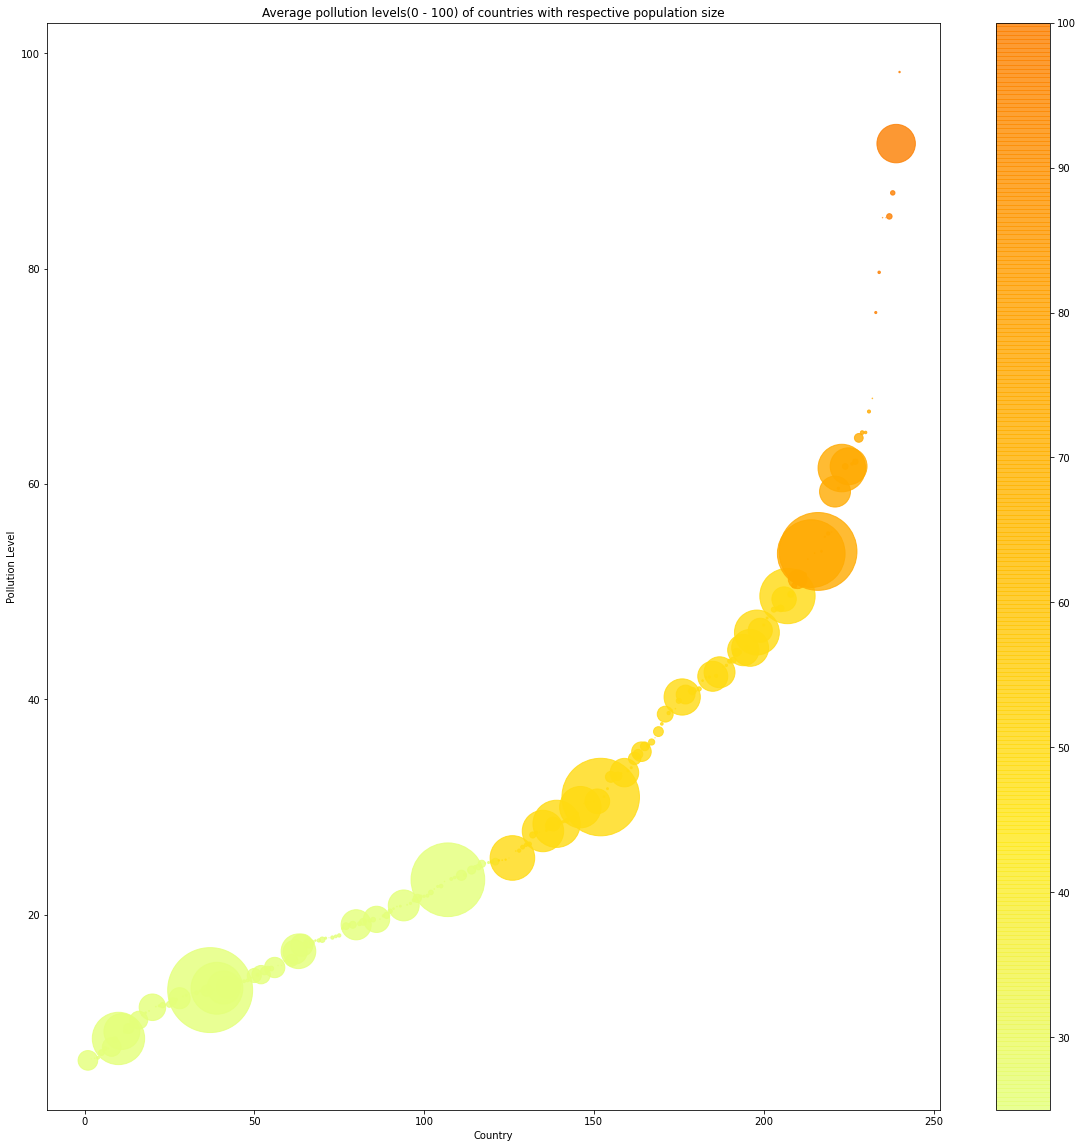

In [127]:
# Compare countries pollution levels

conditions = [
    (s_data['Average'] <= 25),
    (s_data['Average'] > 25) & (s_data['Average'] <= 50),
    (s_data['Average'] > 50) & (s_data['Average'] <= 75),
    (s_data['Average'] > 75)
    ]
c = [25,50,75,100]

s_data['colours'] = np.select(conditions, c)

plt.scatter(s_data['ID'], s_data['Average'],s=s_data["Population"]/1000000, c = s_data["colours"], cmap='Wistia', alpha = 0.8)
plt.gcf().set_size_inches((20, 20))
plt.colorbar()
plt.title("Average pollution levels(0 - 100) of countries with respective population size")
plt.xlabel("Country")
plt.ylabel("Pollution Level")
plt.show()

In [1]:
# Polynomial regresssion - predict future pollution levels globally - average of all countries each year
# X - years 2010 - 2017
# Y - average global pollution levels in respective years
X = np.array(s_data[["2010","2011","2012","2013","2014","2015","2016","2017"]].columns)
X = X.reshape(-1,1)
Y = s_data[["2010","2011","2012","2013","2014","2015","2016","2017"]].mean()


from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

plt.scatter(X.ravel().tolist(), Y, color='red')
plt.plot(X.ravel().tolist(), pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.show()
# Predicting a new result with Polymonial Regression
print("Pollution levels in\n 2020:",pol_reg.predict(poly_reg.fit_transform([['2020']])),
      "\n 2030:",pol_reg.predict(poly_reg.fit_transform([['2030']])),
      "\n 2050:",pol_reg.predict(poly_reg.fit_transform([['2050']])))


NameError: name 'np' is not defined